In [27]:
import pandas as pd
df = pd.read_csv("spotify.csv")
df.head()


,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


In [28]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sum())

Dataset Shape: (10000, 12)

Missing Values:
 0


In [29]:
print("Duplicate:", df.duplicated().sum())
print("dropped:", df.drop_duplicates())
df.drop(columns=["name", "artists"])

Duplicate: 1
dropped:                                                   name  \
0                 We're For The Dark - Remastered 2010   
1                          Sixty Years On - Piano Demo   
2                              Got to Find Another Way   
3     Feelin' Alright - Live At The Fillmore East/1970   
4                                     Caravan - Take 7   
...                                                ...   
9995                                             China   
9996                       Halloweenie III: Seven Days   
9997                                               AYA   
9998                                          Darkness   
9999                   Billetes Azules (with J Balvin)   

                                                artists  popularity  \
0                                         ['Badfinger']          22   
1                                        ['Elton John']          25   
2                                     ['The Guess Who']          21 

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...
9995,72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


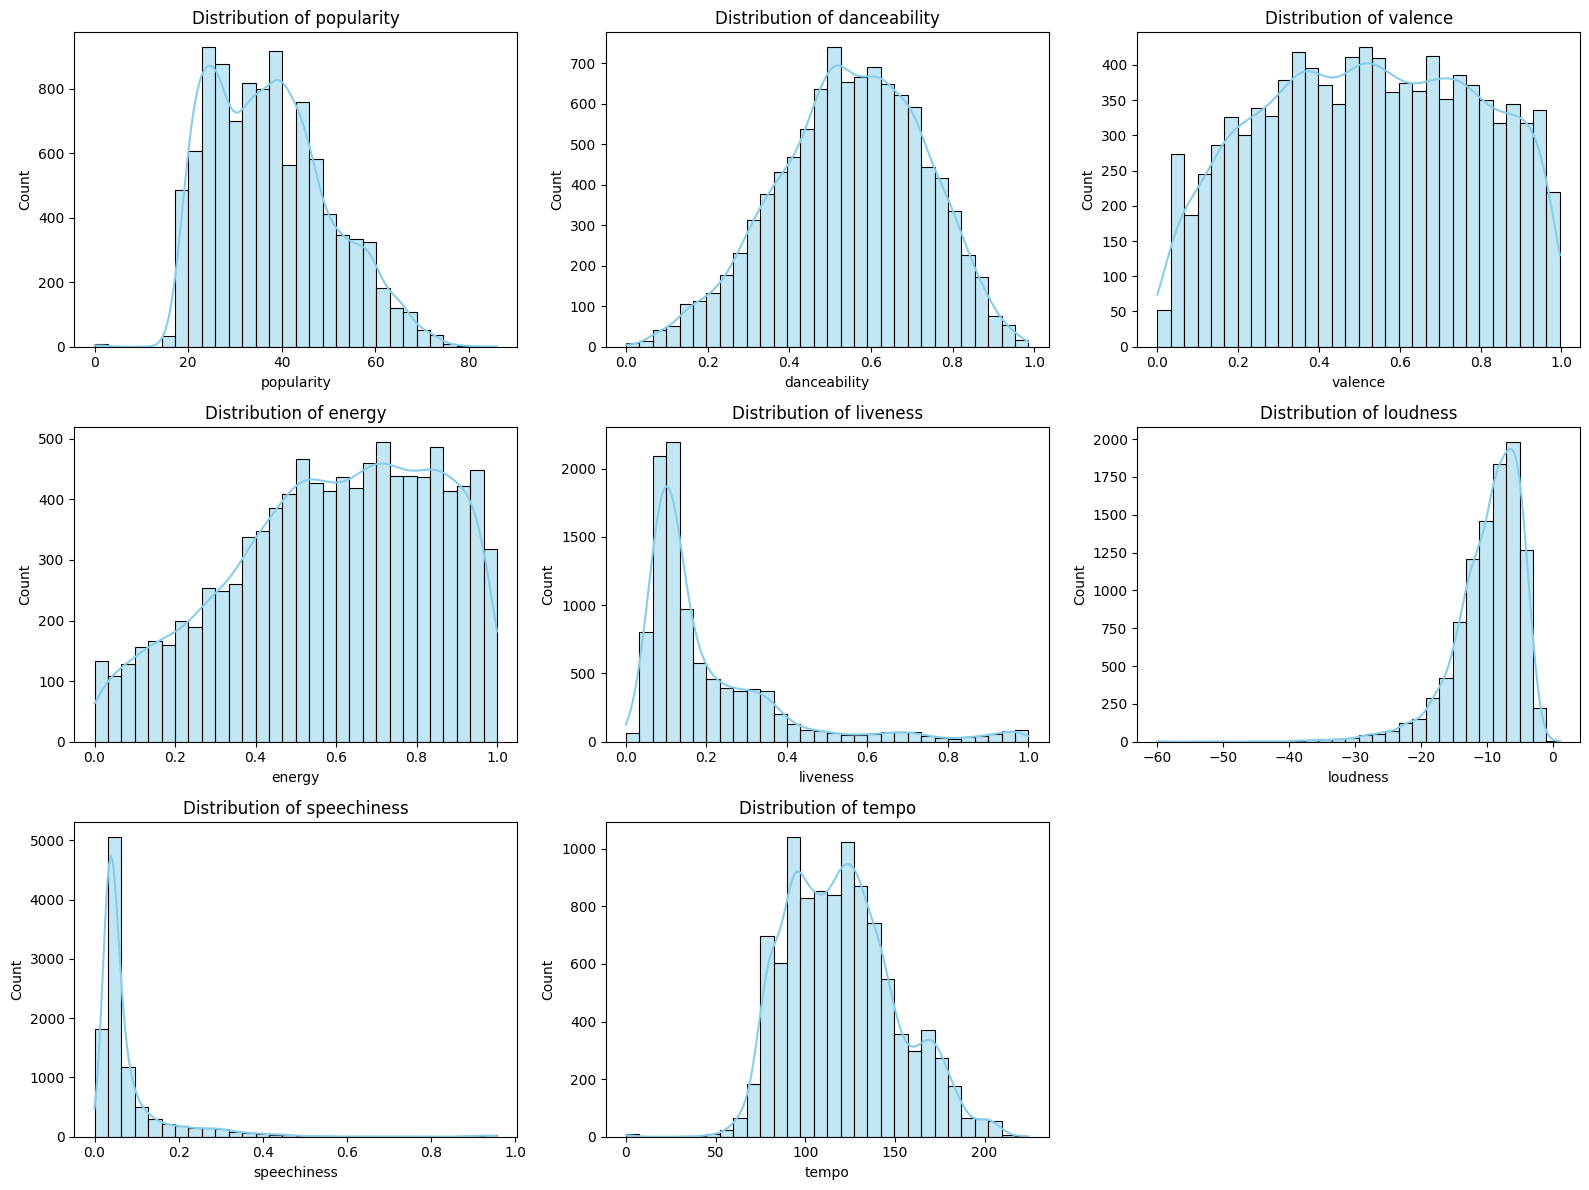

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ["popularity", "danceability", "valence", "energy", 
            "liveness", "loudness", "speechiness", "tempo"]

# Create histograms + KDE plots
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


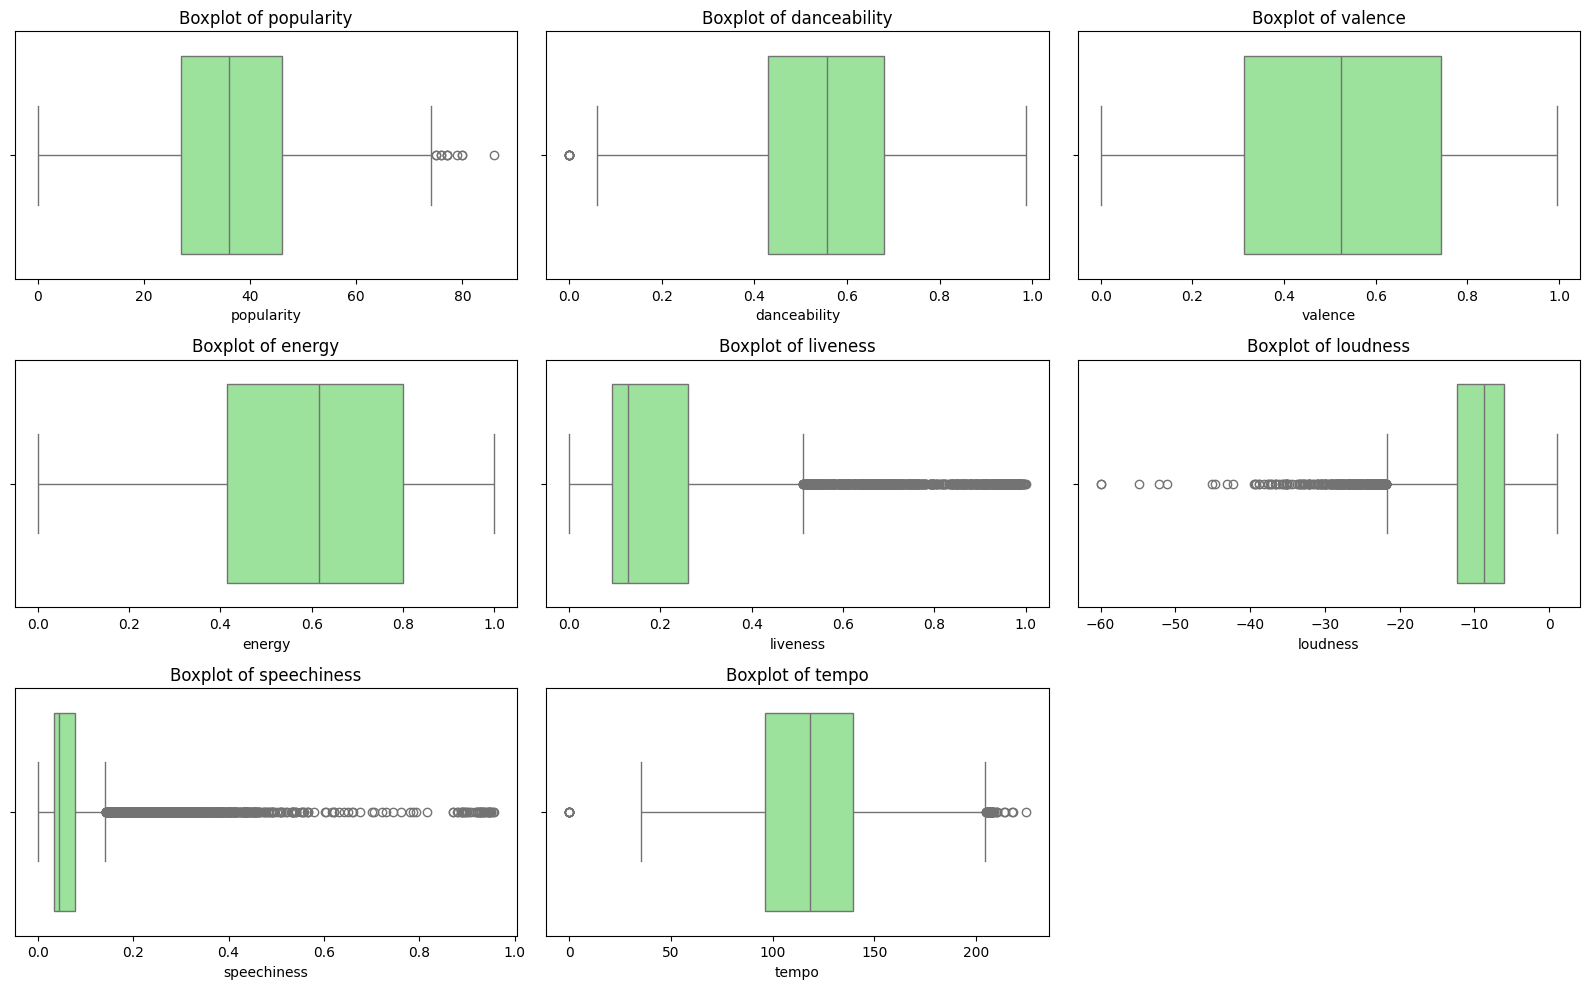

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ["popularity", "danceability", "valence", "energy", 
            "liveness", "loudness", "speechiness", "tempo"]

# Create boxplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13156\3007600295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["explicit"], palette="pastel")
C:\Users\HP\AppData\Local\Temp\ipykernel_13156\3007600295.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["key"], palette="viridis")


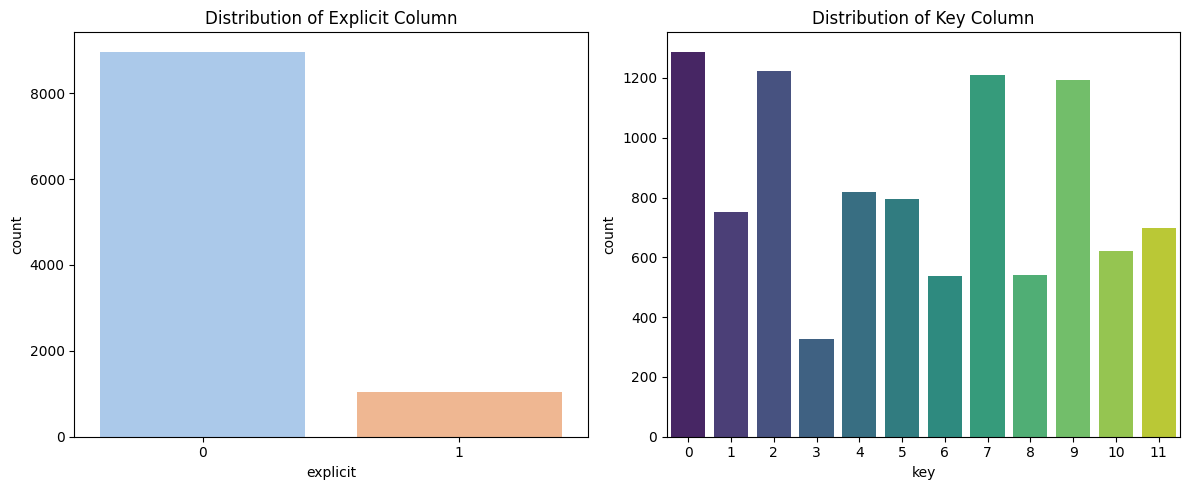

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Explicit distribution
plt.subplot(1, 2, 1)
sns.countplot(x=df["explicit"], palette="pastel")
plt.title("Distribution of Explicit Column")

# Key distribution
plt.subplot(1, 2, 2)
sns.countplot(x=df["key"], palette="viridis")
plt.title("Distribution of Key Column")

plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop unused columns
df = df.drop(columns=["name", "artists"])

# Encode explicit (binary)
df["explicit"] = LabelEncoder().fit_transform(df["explicit"])

# One-hot encode key
df = pd.get_dummies(df, columns=["key"], drop_first=True)

# Features to scale
minmax_cols = ["danceability", "valence", "energy", "liveness", "speechiness"]
standard_cols = ["loudness", "tempo"]
robust_cols = ["popularity"]

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("minmax", MinMaxScaler(), minmax_cols),
        ("standard", StandardScaler(), standard_cols),
        ("robust", RobustScaler(), robust_cols)
    ],
    remainder="passthrough"  # keep encoded categorical
)

# Apply scaling
scaled_features = preprocessor.fit_transform(df)

# Create scaled DataFrame
scaled_df = pd.DataFrame(
    scaled_features,
    columns=minmax_cols + standard_cols + robust_cols +
            ["explicit"] + [col for col in df.columns if col.startswith("key_")]
)

print("Final dataset shape:", scaled_df.shape)
scaled_df.head()


Final dataset shape: (10000, 20)


,danceability,valence,energy,liveness,speechiness,loudness,tempo,popularity,explicit,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.687627,0.561245,0.432,0.0727,0.034901,-0.540084,-0.082809,-0.736842,0,False,False,True,False,False,False,False,False,False,False,False
1,0.462475,0.26004,0.368,0.156,0.029258,-0.163448,0.780035,-0.578947,0,False,False,False,False,False,True,False,False,False,False,False
2,0.439148,0.836345,0.724,0.17,0.039498,0.003632,-1.18439,-0.789474,0,False,False,False,False,False,False,False,False,False,False,False
3,0.442191,0.873494,0.914,0.855,0.063741,0.53889,1.778805,-0.736842,0,False,False,False,False,True,False,False,False,False,False,False
4,0.678499,0.566265,0.412,0.401,0.070951,-0.615072,-1.370283,-0.684211,0,False,False,False,False,False,False,True,False,False,False,False


### K-Means

c:\Users\HP\Desktop\Machine learning 2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\Desktop\Machine learning 2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


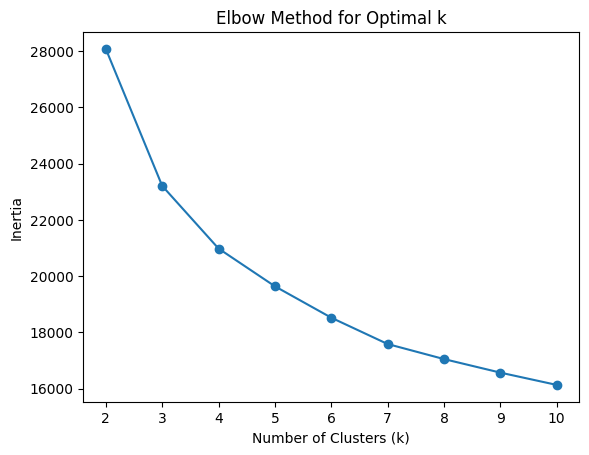

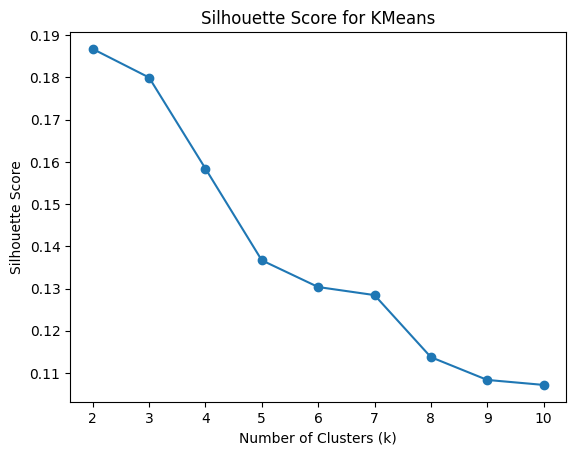

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k values
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Elbow Method
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Silhouette Score
plt.plot(K, silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans")
plt.show()


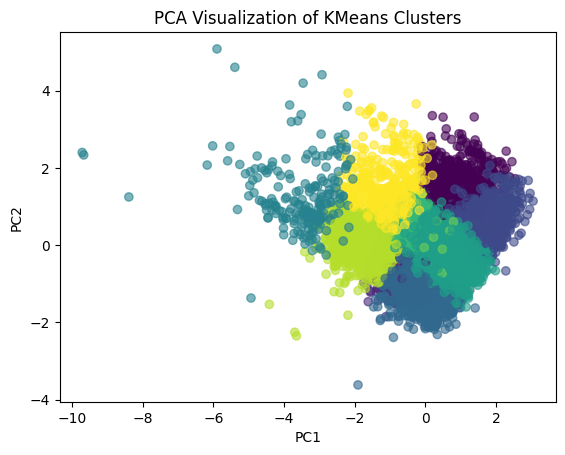

In [41]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans.labels_, cmap="viridis", alpha=0.6)
plt.title("PCA Visualization of KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


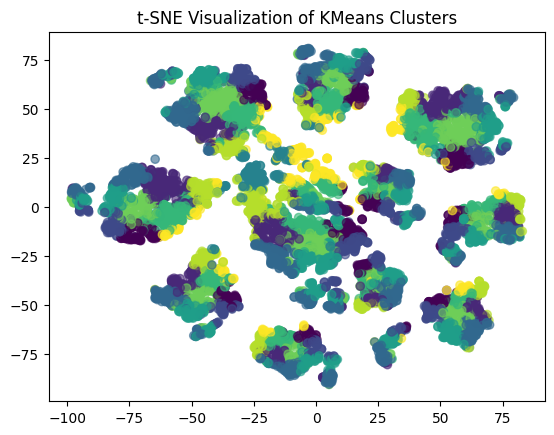

In [42]:
# t-SNE (fixed with max_iter)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
tsne_result = tsne.fit_transform(scaled_df)

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans.labels_, cmap="viridis", alpha=0.6)
plt.title("t-SNE Visualization of KMeans Clusters")
plt.show()


### DBSCAN

DBSCAN found 1 clusters


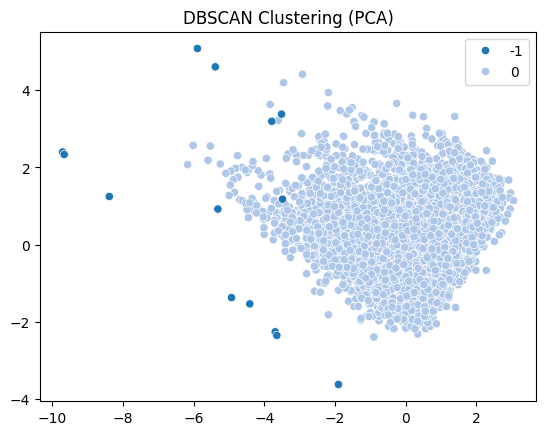

In [45]:
from sklearn.cluster import DBSCAN
import numpy as np

# =====================
# DBSCAN
# =====================
db = DBSCAN(eps=1.5, min_samples=5)  # tune eps & min_samples
labels_db = db.fit_predict(scaled_df)

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(f"DBSCAN found {n_clusters} clusters")

# Handle silhouette only if more than 1 cluster
if n_clusters > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_df, labels_db))

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels_db, palette="tab20", legend="full")
plt.title("DBSCAN Clustering (PCA)")
plt.show()


### Gaussian Mixture Method

GMM Silhouette Score: 0.02647678456522741


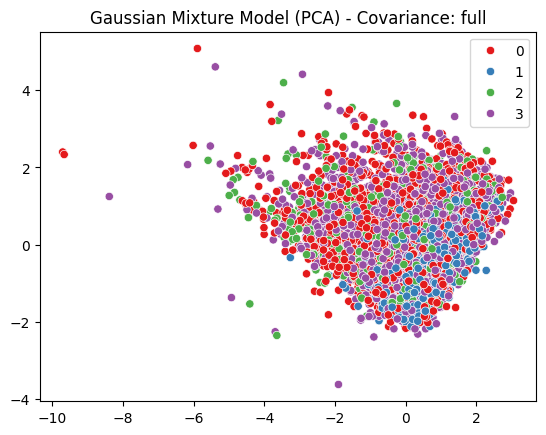

In [48]:
from sklearn.mixture import GaussianMixture

# =====================
# GMM with covariance type
# =====================
gmm = GaussianMixture(
    n_components=4, 
    covariance_type="full",   # change to "tied", "diag", or "spherical"
    random_state=42
)

labels_gmm = gmm.fit_predict(scaled_df)

print("GMM Silhouette Score:", silhouette_score(scaled_df, labels_gmm))

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels_gmm, palette="Set1")
plt.title("Gaussian Mixture Model (PCA) - Covariance: full")
plt.show()


### Hierachial Clustering

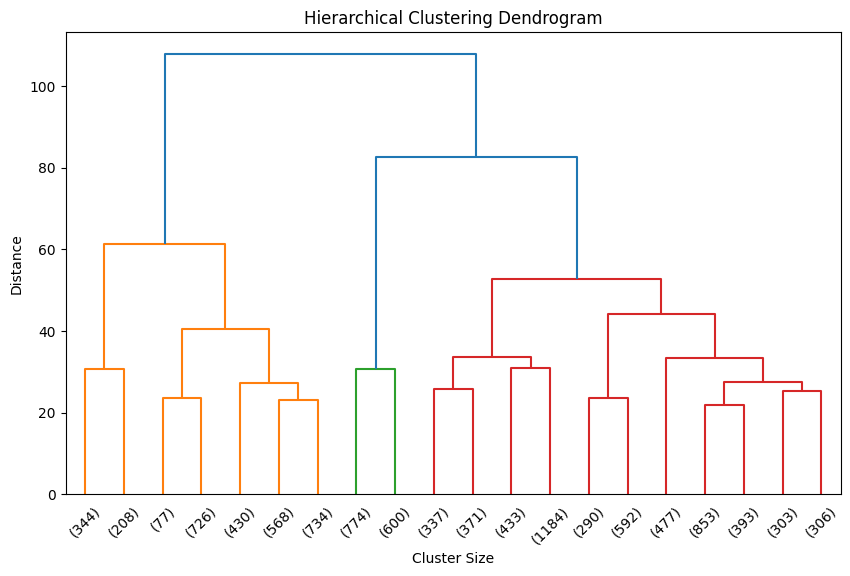

Hierarchical Silhouette Score: 0.09885423209927399
Hierarchical Cluster Sizes:
0    5539
1    2535
2    1374
3     552
Name: count, dtype: int64


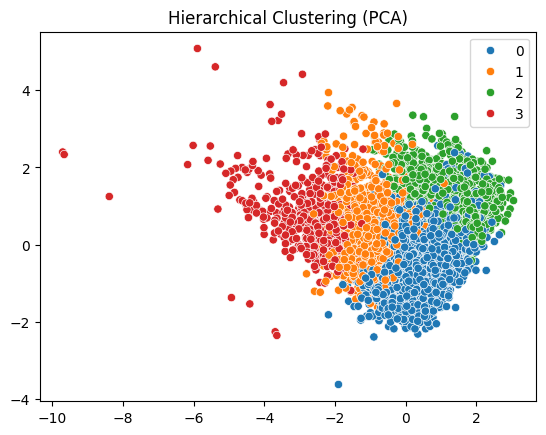

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# =====================
# Dendrogram
# =====================
plt.figure(figsize=(10, 6))
Z = linkage(scaled_df, method='ward')
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# =====================
# Agglomerative Clustering
# =====================
hier = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_hc = hier.fit_predict(scaled_df)

print("Hierarchical Silhouette Score:", silhouette_score(scaled_df, labels_hc))

# Cluster sizes
print("Hierarchical Cluster Sizes:")
print(pd.Series(labels_hc).value_counts())

sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=labels_hc, palette="tab10")
plt.title("Hierarchical Clustering (PCA)")
plt.show()
